In [1]:
# https://towardsdatascience.com/image-segmentation-using-pythons-scikit-image-module-533a61ecc980

In [2]:
from PIL import Image

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

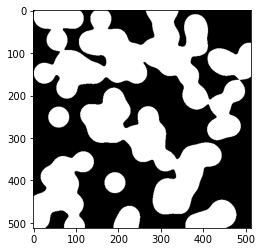

In [4]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
image = data.binary_blobs()
plt.imshow(image, cmap='gray')

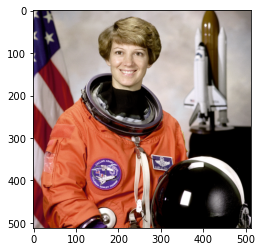

In [5]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
image = data.astronaut()
plt.imshow(image)

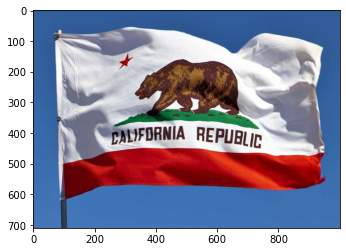

In [6]:
# The I/O module is used for importing the image
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
image = io.imread('california_1.png')
plt.imshow(image);

In [7]:
# # loading multiple images

# images = io.ImageCollection('../images/*.png:../images/*.jpg')
# print('Type:', type(images))
# images.files
# Out[]: Type: <class ‘skimage.io.collection.ImageCollection’>

In [8]:
# #Saving file as ‘logo.png’
# io.imsave('logo.png', logo)

In [9]:
# Thresholding

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [11]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

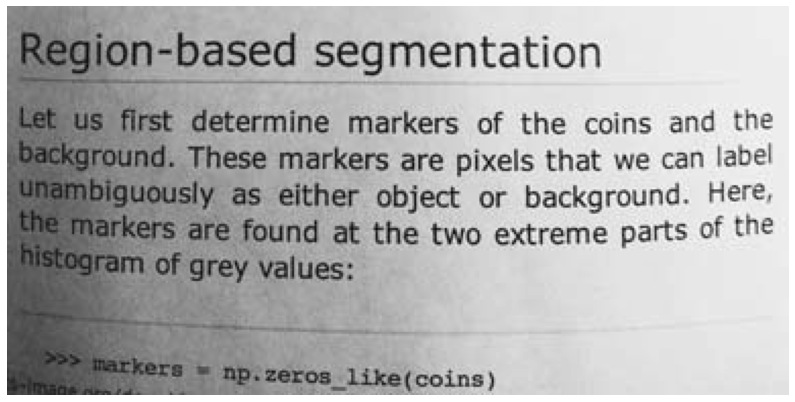

In [12]:
text = data.page()
image_show(text)

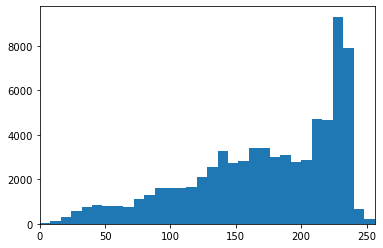

In [13]:
fig, ax = plt.subplots(1, 1)
ax.hist(text.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

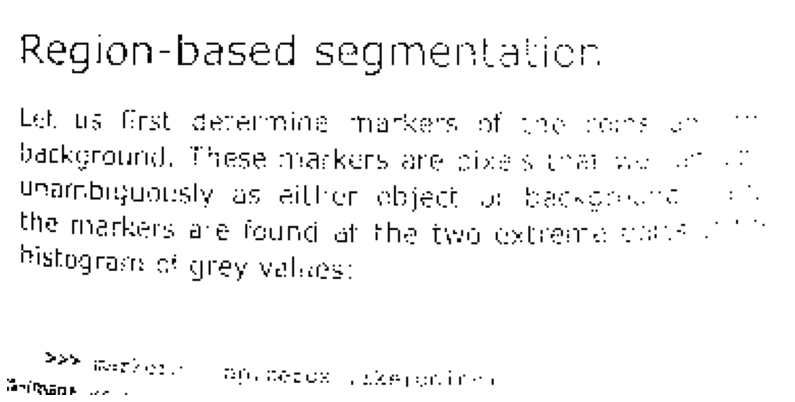

In [14]:
# value concluded from histogram i.e 50,70,120 

value = 50

text_segmented = text > (value)
image_show(text_segmented);

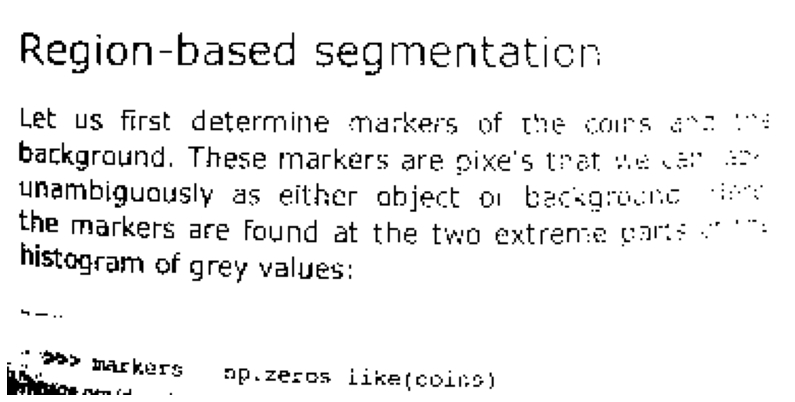

In [15]:
value = 70

text_segmented = text > (value)
image_show(text_segmented);

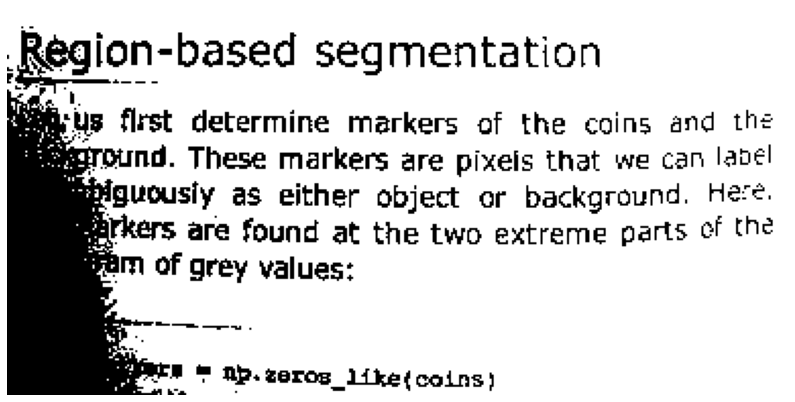

In [16]:
value = 120

text_segmented = text > (value)
image_show(text_segmented);

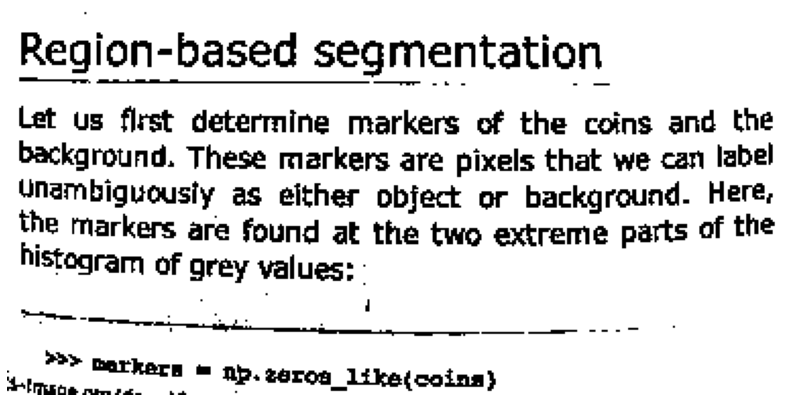

In [17]:
# region based thresholding

text_threshold = filters.threshold_local(text,block_size=51, offset=10) 
image_show(text > text_threshold);

In [18]:
# Supervised thresholding

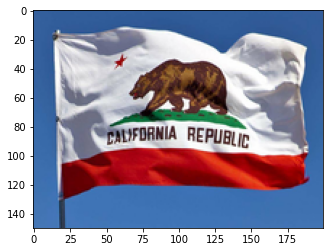

In [19]:
image = Image.open("california_1.png")
image = image.resize((200,150),Image.ANTIALIAS)
# image.save(fp="newimage.png")
image = np.array(image)
plt.imshow(image);

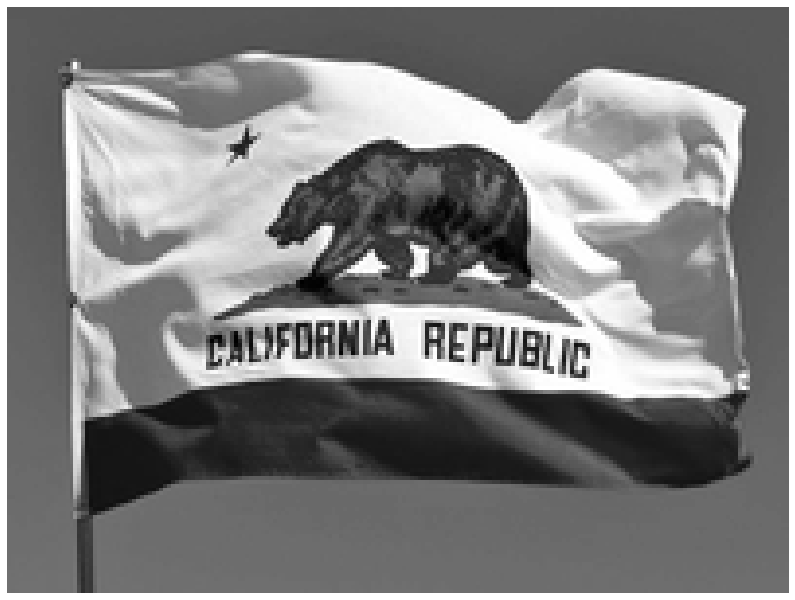

In [20]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);

In [21]:
# Additive coutour segementation

In [22]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

In [23]:
def rectangle_points(x,y,width, height, resolution):
    points = []

    for i in np.linspace(y, y + height, resolution):
        points.append([x, i])    
    y1 = i

    for i in np.linspace(x, x + width, resolution):
        points.append([i, y1])
    x1 = i

    for i in np.linspace(y + height, y, resolution):
        points.append([x1, i])
    y1 = i

    for i in np.linspace(x + width, x, resolution):
        points.append([i, y1])
        
    return(np.array(points))

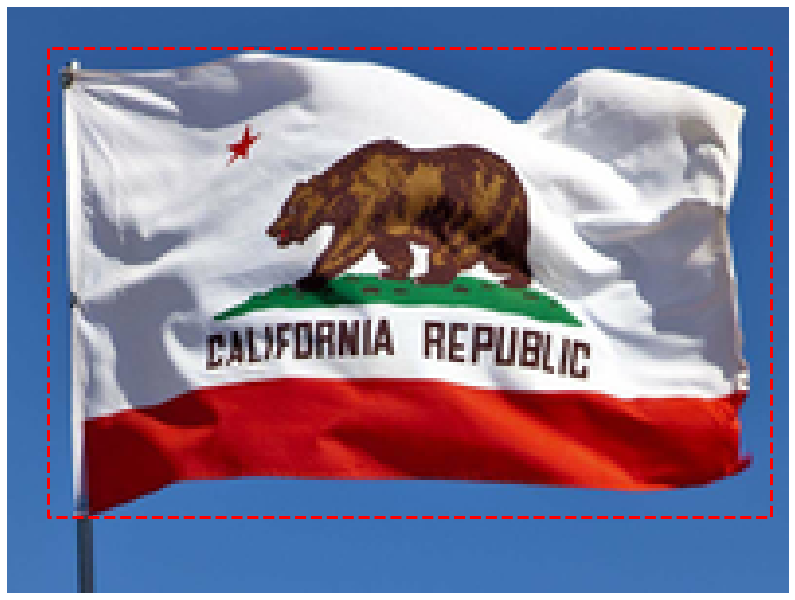

In [24]:
# Exclude last point because a closed path should not have duplicate points
# points = circle_points(200, [400, 1110], 325)[:-1]
# points = circle_points(200, [75, 100], 100)[:-1] # bear
# points = circle_points(200, [100, 250], 80)[:-1] # lady

points = rectangle_points(10,10,width = 185, height = 120, resolution = 100)


fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

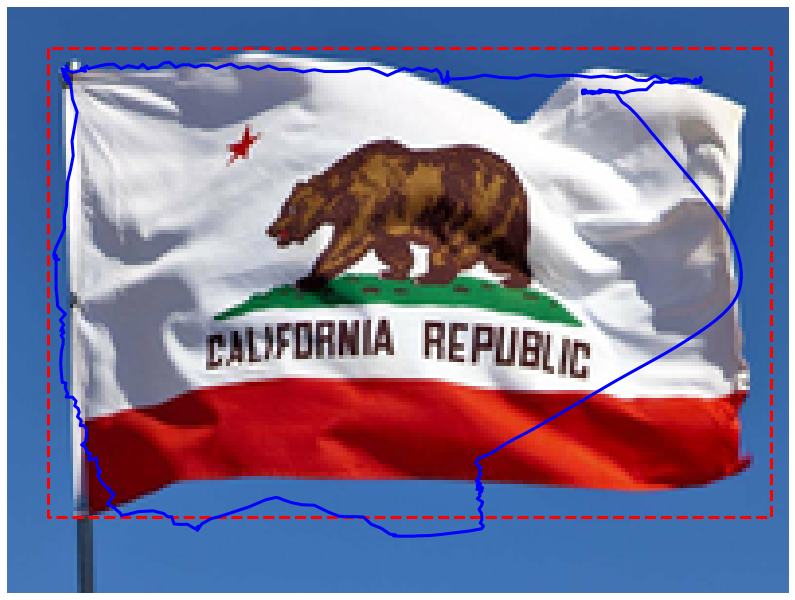

In [25]:
snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

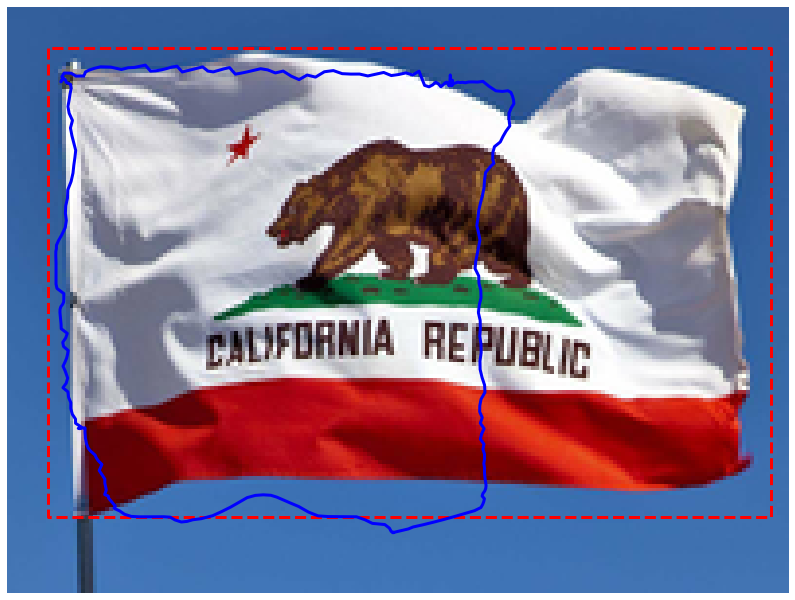

In [26]:
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [27]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

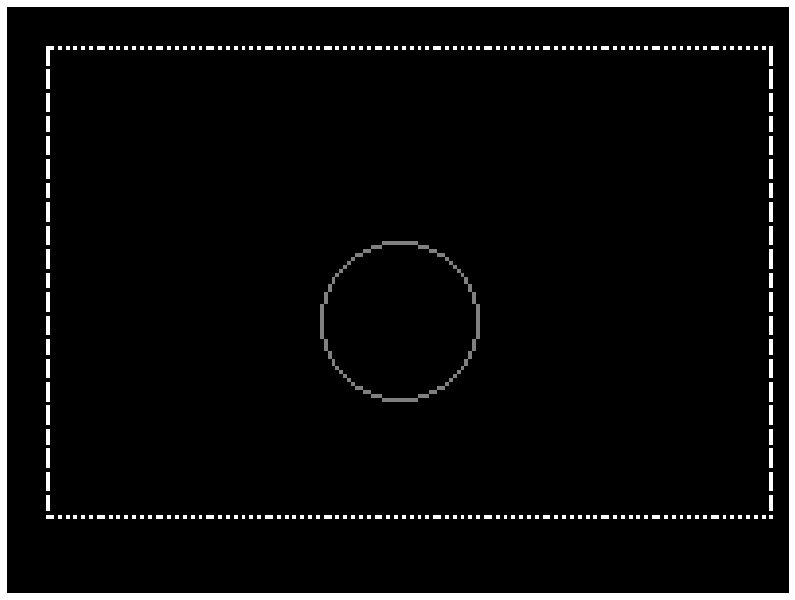

In [28]:
indices = draw.circle_perimeter(80, 100,20)#from here
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels);

<ipython-input-29-01d28771423d>:1: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  image_segmented = seg.random_walker(image_gray, image_labels)


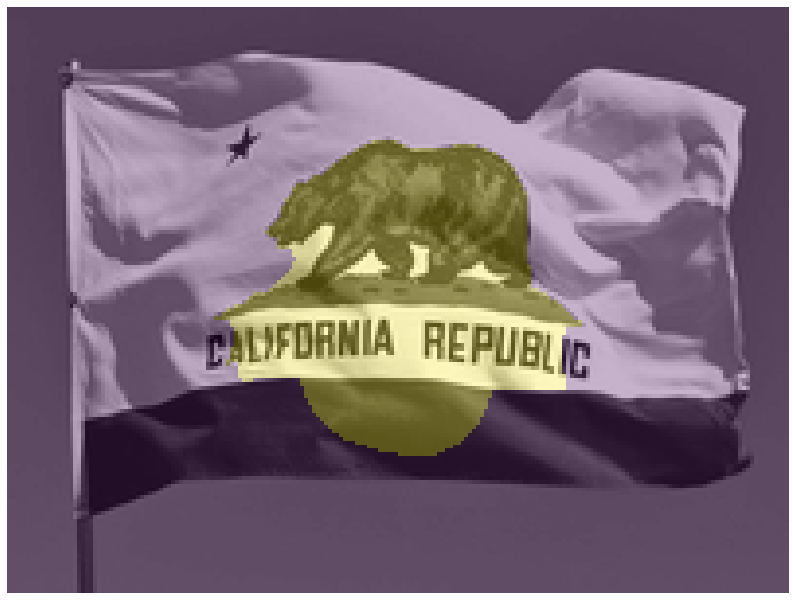

In [29]:
image_segmented = seg.random_walker(image_gray, image_labels)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

<ipython-input-59-2173c898633b>:1: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  image_segmented = seg.random_walker(image_gray, image_labels, beta = 4000)


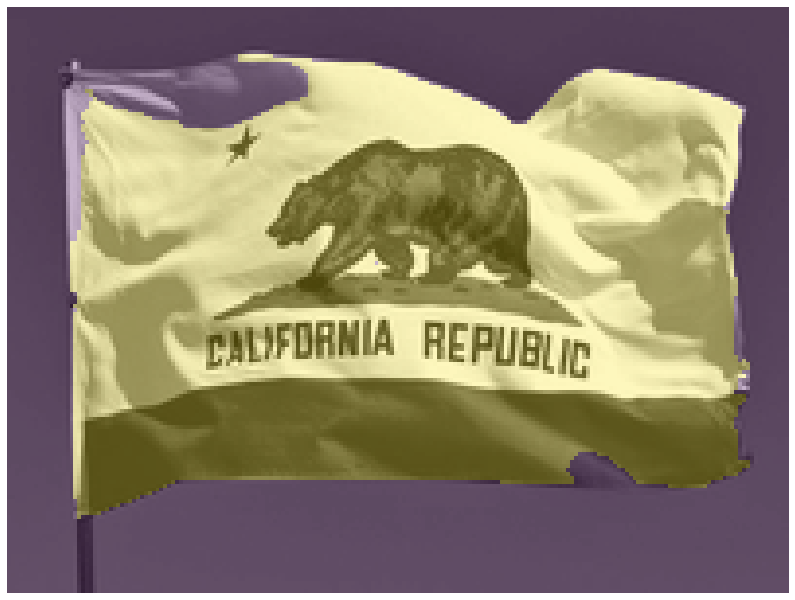

In [59]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 4000)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

In [ ]:
image_2 = image

In [69]:
for i in range(image_2.shape[0]):
    for j in range(image_2.shape[1]):
        if image_segmented[i,j] != 1:
            image_2[i, j] = np.array([255,255,255])

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

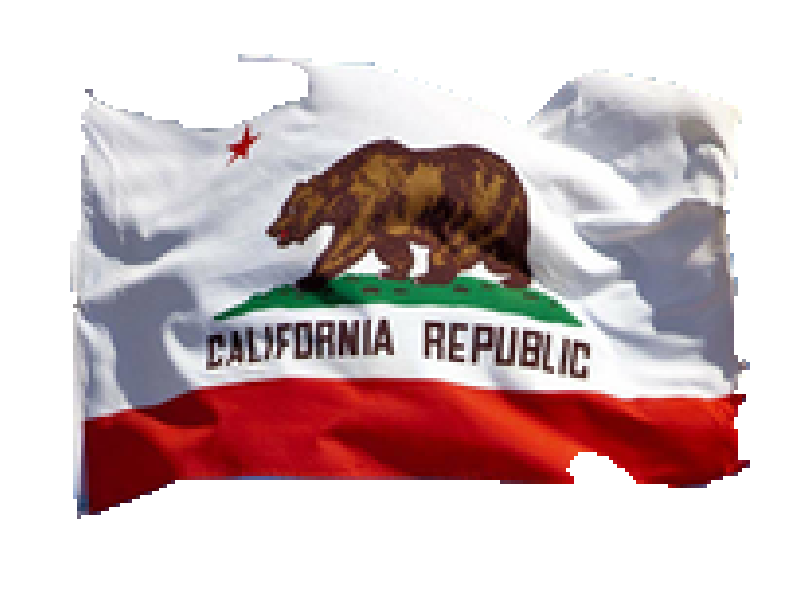

In [70]:
image_show(image_2)

In [71]:
io.imsave('cali_test.png', image_2)